## Machine Learning for Signal Processing 2019/2020 
### Teacher: Danilo Comminiello<br>Exam Project

* **Project title**: *Deep Learning for Automatic Speech Recognition in HR*.
* **Student(s)**: *Francesco Vincelli, 1727959*.
* **Reference paper / topic**: Titouan Parcollet1, Mirco Ravanelli, Mohamed Morchid, Georges Linarès, Renato De Mor ; *Speech Recognitionwith Quaternion Neural Networks* (32nd Conference on Neural Information Processing Systems (NIPS 2018), IRASL workshop Montréal, Canada).
* **Starting and delivery dates**: *April 8th, 2021* [I can check so you'd rather be honest ;)]

*Rename the notebook as*: [MLSP]_Project_LastName1_LastName2_LastName3.ipynb.

## Part 1: Report

### 1.1 Deep Convolutional Neural Networks for Automatic Speech Recognition
 
State-of-the-art automatic speech recognition (ASR) systems map the speech signal into its corresponding text. Traditional ASR systems are based on Gaussian mixture model. The emergence of deep learning drastically improved the recognition rate of ASR systems, replacing traditional ones.

Deep learning systems can also be trained in end-to-end manner. End-to-end ASR systems are gaining much popularity due to simplified model-building process and abilities to directly map speech into the text without any predefined alignments. Three major types of end-to-end architectures for ASR are:
- attention-based methods
- connectionist temporal classification
- convolutional neural network (CNN)-based direct raw speech model.

In this work, CNN-based acoustic model (both real and quaternionic) with Connectionist Temporal Classification is discussed. It establishes the relation between raw speech signal and phones in a data-driven manner. 
Relevant features and classifier both are jointly learned from the raw speech which is processed by first convolutional layer to learn the feature representation. The output of first convolutional layer represents an intermediate representation, which is more discriminative and further processed by rest convolutional layers.

This system uses only few parameters and performs better than traditional cepstral feature-based systems. The performance of the system is evaluated for LibriSpeech ASR Corpus dataset and claimed similar performance as MFCC.

### 2. Quaternion Neural Networks for ASR

While recent researches focus on novel model architectures, the acoustic input features remain almost unchanged. Traditional ASR systems rely on multidimensional acoustic features such as the *Mel filter
bank* energies alongside with the first, and second order derivatives to characterize time-frames that compose the signal sequence. Considering that these components describe three different views of the same element, neural networks have to learn both the internal relations that exist within these features, and external or global dependencies that exist between the time-frames. 

Quaternion-valued neural networks (QNN), recently received an important interest from researchers to process and learn such relations in multidimensional spaces. Indeed, quaternion numbers and QNNs have shown their efficiency to process multidimensional inputs as entities, to encode internal dependencies, and to solve many tasks with up to four times less learning parameters than real-valued models. 

### 3. Motivations
#### 3.1. Drawbacks of Real-valued NNs for ASR
A major challenge of current machine learning models is to obtain efficient representations of relevant information for solving a specific task.

Nonetheless, real-valued neural networks usually require a huge set of parameters to well-perform on speech recognition tasks, and hardly code internal dependencies within the features, since they are considered at the same level as global dependencies during the learning.

#### 3.2. Advantage of Quaternions in speech signal features representation
A better representation of multidimensional data has to be explored to naturally capture internal relations within the input features. For example, an efficient way to represent the information composing an acoustic signal sequence is to consider each time-frame as being a whole entity of three strongly related elements, instead of a group of unidimensional elements that could be related to each others, as in traditional real-valued neural networks. Indeed, with a real-valued NN, the latent relations between the Mel filter banks energies, and the first and second order derivatives of a given time-frame are hardly coded in the latent space since the weight has to find out these relations among all the time-frames composing the sequence. Quaternions are fourth dimensional entities and allow one to build and process elements made of up to four elements, mitigating the above described problem. Indeed, the quaternion algebra and more precisely the Hamilton product allows quaternion neural network to capture these internal latent relations within the features of a quaternion. In fact, the quaternion-weight components are shared through multiple quaternion input parts during the Hamilton product , creating relations within the elements.

Figure below shows that the multiple weights required to code latent relations within a feature are considered at the same level as for learning global relations between different features, while the quaternion weight *w* codes these internal relations within a unique quaternion $Q_{out}$ during the Hamilton product.

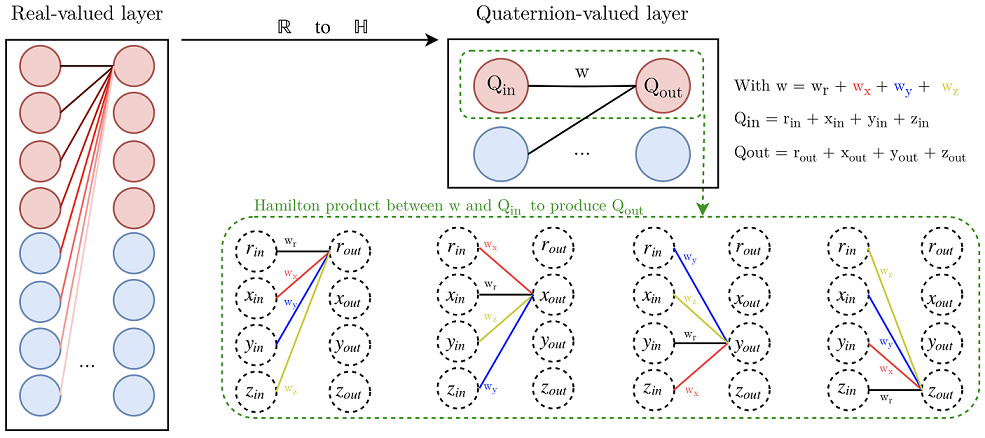

Second, quaternion neural networks make it possible to deal with the same signal dimension than real-valued NN, but with four times less neural parameters. Indeed, a 4-number quaternion weight linking two 4-number quaternion units only has 4 degrees of freedom, whereas a standard neural net parametrization have 4 × 4 = 16, i.e., a 4-fold saving in memory. Therefore, the natural multidimensional representation of quaternions alongside with their ability to drastically reduce the number of parameters indicate that hyper-complex numbers are a better fit than real numbers to create more efficient models in multidimensional spaces such as speech recognition.

### 4. Quaternion Neural Networks
Real-valued neural networks architectures are extended to the quaternion domain to benefit from its capacities.

The quaternion algebra H defines operations between quaternion numbers. $A$ quaternion Q is an extension of a complex number defined in a four dimensional space as:
$$ Q = r1 +x\mathbf{i} +y\mathbf{j} +z\mathbf{k} $$

where r, x, y, and z are real numbers, and 1, \mathbf{i}, \mathbf{j}, and \mathbf{k} are the quaternion unit basis. In a quaternion, r is the real part, while $x\mathbf{i} + y\mathbf{j} + z\mathbf{k}$ with $\mathbf{i}^2 = \mathbf{j}^2 = \mathbf{k}^2 = \mathbf{ijk} = −1$ is the imaginary part, or the
vector part. Such a definition can be used to describe spatial rotations. The information embedded in
the quaterion $Q$ can be summarized into the following matrix of real numbers, that turns out to be more suitable for computations:

$$
Q_{mat} = \begin{bmatrix} 
r & -x & -y & -z \\
x & r & -z & y \\
y & z & r & -x \\
z & -y & x & r
\end{bmatrix}
$$

The conjugate $Q^*$ of $Q$ is defined as:
$$ Q^* = r1 -x\mathbf{i} - y\mathbf{j} -z\mathbf{k} $$

Then, a normalized or unit quaternion $Q^n$ is expressed as:

$$
Q^n = \frac{Q}{\sqrt{r^2 + x^2 + y^2 + z^2}}
$$

Finally, the Hamilton product ⊗ between two quaternions $Q_1$ and $Q_2$ is computed as follows:

\begin{equation}
\begin{split}
Q_1 ⊗ Q_2  = &(r_1 r_2 - x_1 x_2 - y_1 y_2 - z_1 z_2) \\
&(r_1 x_2 - x_1 r_2 - y_1 z_2 - z_1 y_2)\mathbf{i} \\
&(r_1 y_2 - x_1 z_2 - y_1 r_2 - z_1 x_2)\mathbf{j} \\
&(r_1 z_2 - x_1 y_2 - y_1 x_2 - z_1 r_2)\mathbf{k} \\
\end{split}
\end{equation}

4.1 Quaternion Convolutional Networks (QCNNs)

Convolutional neural networks (CNN) have been proposed to capture the high-level relations that occur between neighbours features such as shape and edges on an image. However, internal dependencies within the features are considered at the same level than these high-level relationsby real-valued CNNs, and it is thus not guaranteed that they are well-captured.  In this extend, aquaternion convolutional neural network (QCNN) have been proposed. Let $y_{ab}^l$ and $S_{ab}^l$, be the quaternion output and the pre-activation quaternion output at layer $l$ and at the indexes$(a,b)$ of the new feature map, and $w$ the quaternion-valued weight filter map of size $K×K$. A formal definition of the convolution process is:

$$
y_{ab}^l = \alpha (S_{ab}^l)
$$

with

$$
S_{ab}^l = \sum_{c=0}^{k-1} \sum_{d=0}^{k-1} w^{l-1} ⊗ y_{(a+c)(b+d)}^l
$$

and where $\alpha$ is a quaternion split activation function defined as:

$$
\alpha(Q) = f(r) + f(x)\mathbf{i} + f(y)\mathbf{j} + f(z)\mathbf{k}
$$

with $f$ corresponding to any standard activation function. The output layer of a quaternion neuralnetwork is commonly either quaternion-valued such as for quaternion approximation, or real-valued to obtains a posterior distribution based on a softmax function following the split approach ofEq. 8. Indeed, target classes are often expressed as real numbers. Finally, the full derivation of thebackpropagation algorithm for quaternion valued neural networks can be found in.

### 1.2 Neural Network Architectures for End-to-End Automatic Speech Recognition

#### 1.2.1 Temporal Convolutional Networks

TCNs are inspired by recent convolutional architectures for sequential data and combines simplicity, autoregressive prediction, and very long memory. The TCN is designed from two basic principles:

- The convolutions are causal, meaning that there is no information leakage from future to past.

- The architecture can take a sequence of any length and map it to an output sequence of the same length just as with an RNN.

To achieve the first point, the TCN uses causal convolutions, i.e., convolutions where an output at time $t$ is convolved only with elements from time $t$ and earlier in the previous layer. To accomplish the second point, the TCN uses a *1D fully-convolutional* network architecture, where each hidden layer is the same length as the input layer.


##### **Dilated Convolution**

Simple causal convolutions have the disadvantage to only look back at history with size linear in the depth of the network, i.e. the receptive field grows linearly with every additional layer. To circumvent this fact, the architecture employs dilated convolutions that enable an exponentially large receptive field. More formally, for an input sequence $x \in \mathbb{R}$ and a filter $h : \{0, ..., k-1\} \rightarrow  \mathbb{R}$ , the dilated convolution operation $H$ on element $x$ of the sequence is defined as
$$
H(x) = (x_d h)(x) = \sum_{i=0}^{k-1} f(i) x_{s-d \cdot i} 
$$
where $d=2^v$ is the dilation factor, with the level of the network, and $k$ is the filter size. The term $s-d \cdot i$ accounts for the direction of the past. Dilation is equivalent to introducing a fixed step between every two adjacent filter taps, as it can be seen in the following figure:

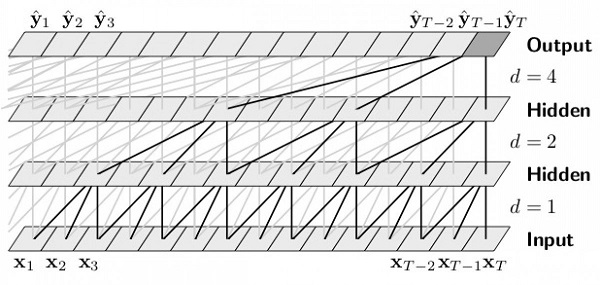

Using larger dilation enables an output at the top level to represent a wider range of inputs, thus effectively expanding the receptive field of a CNN. There are two ways to increase the receptive field of a TCN: choosing lager filter sizes $k$ and increasing the dilation factor $d$, since the effective history of one layer is $(k-1)d$

**Residual Block**

Another architectural element of a TCN are residual connections. In place of a convolutional layer, TCNs employ a generic residual module. Each residual block contains a branch leading out to a series of transformations $\mathcal{F}$ , whose outputs are added to the input $x$ of the block:
$$o = Activation(x + \mathcal{F}(x))$$

This effectively allows layers to learn modifications to the identity mapping rather than the entire transformation, which has been shown to benefit deep neural networks. Especially for very deep networks stabilization becomes important, for example, in the case where the prediction depends on a large history size ($>2^{12}$) with a high-dimensional input sequence.

A residual block has two layers of dilated causal convolutions and rectified linear units (ReLU) as non-linearities as shown in the following figure:

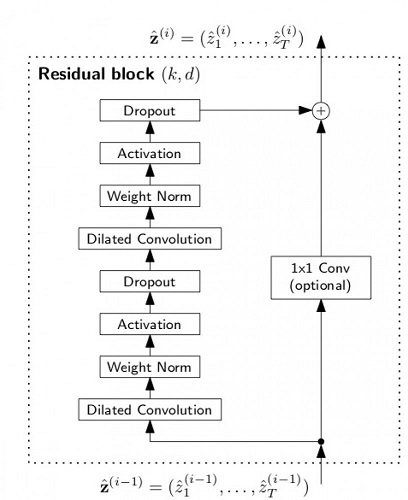

Weight normalization (Salimans, 2016) is applied to the convolutional filters and a spatial dropout (Srivastava, 2014) is added after each dilated convolution for regularization, meaning that at each training step a whole channel is zeroed out.


Thus, the TCN architecture appears not only to be more accurate than canonical recurrent networks such as LSTMs and GRUs, it also contains the following properties: 

- Parallelism: Unlike in RNNs where the predictions for later time steps must wait for their predecessors to complete, convolutions can be calculated in parallel because the same filter is used in each layer. Therefore, in both training and evaluation, a long input sequence can be processed as a whole, instead of sequentially as in RNNs.

- Flexible receptive field size: The receptive field size can be changed in multiple ways. For instance, stacking more dilated convolutional layers, using larger dilation factors, or increasing the filter size are all viable options. Thus, TCNs afford better control of the model’s memory size, and are easy to adapt to different domains.
    
- Low memory requirement for training: Especially in the case of a long input sequence, LSTMs and GRUs can easily use up a lot of memory to store the partial results for their multiple cell gates. In TCNs, however, the filters are shared across a layer, with the back-propagation path depending only on the network depth.

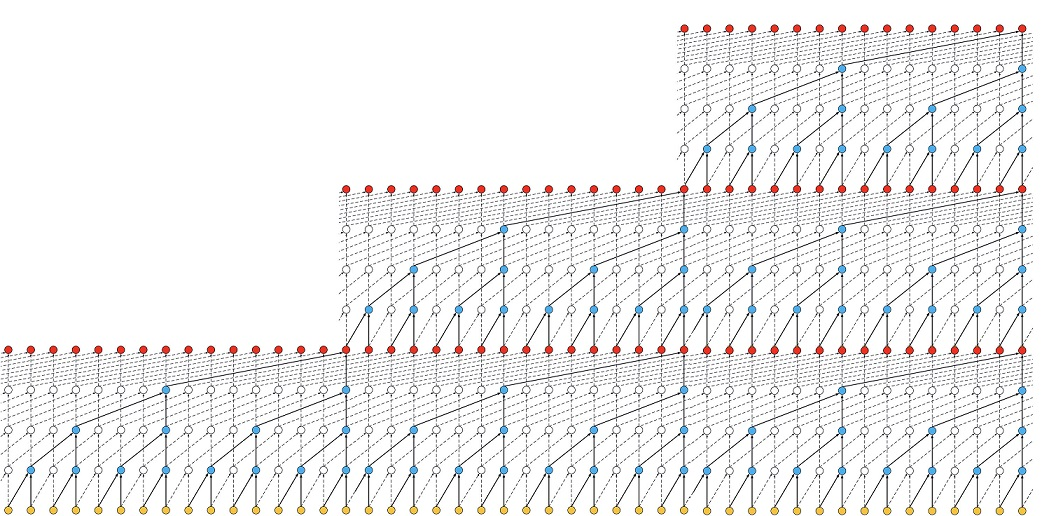

#### 1.2.2 Residual-Convolutional (Time-Distributed) Networks

The Residual Network, or *ResNet*, architecture for convolutional neural networks was proposed by Kaiming He, et al. in their 2016 paper titled “Deep Residual Learning for Image Recognition”.
A key innovation in the ResNet arhitecture was the residual module. The residual module, specifically the identity residual model, is a block of two convolutional layers with the same number of filters and a small filter size where the output of the second layer is added with the input to the first convolutional layer. Drawn as a graph, the input to the module is added to the output of the module and is called a shortcut connection.

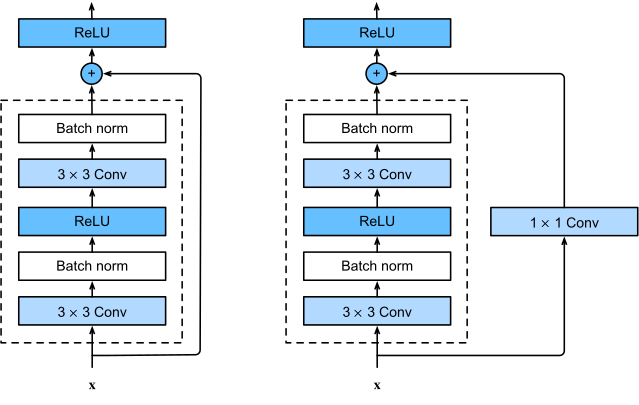

A limitation with a direct implementation of the residual block is that if the number of filters in the input layer does not match the number of filters in the last convolutional layer of the module (defined by n_filters), then we will get an error.

One solution is to use a $1×1$ convolution layer, often referred to as a *projection layer*, to either increase the number of filters for the input layer or reduce the number of filters for the last convolutional layer in the module. The former solution makes more sense, and is the approach proposed in the paper, referred to as a projection shortcut.

Differently from the canonical ResNet architecture, the fully-connected block on the top of the network exploits the *TimeDistributed* wrapper layer.

When we are dealing with input data which are chronologically ordered, such as, in this case, a sequence of phonemes and the respective frequences in an audio signal, what we need is to be able to inject a sequence as input, and to make predictions of what that sequence is showing.

The output of the convolutional stage (performed by the residual blocks) is sequence of outputs: that means the output is a processed time series, with sequential information in it. We want Dense() layers to take this information and use it to process the signal further. In particular, you want some Dense architecture to process each of these sequential outputs one by one. By using the TimeDistributed() wrapper it's like if you're iterating the same Dense() architecture on this sequential output.

In [ ]:
# In case you forgot the answer to the Ultimate Question of Life, the Universe and Everything
# !pip install python-42

### Mount GDrive Directory

In [ ]:
# ============================
# Mount gdrive workig directory

from google.colab import drive
drive.mount('/content/gdrive')

# Set up workdir
%cd "gdrive/My Drive/[MLSP]_Project/"
!ls

### Installing and Importing Requirements

In [ ]:
# ====================
# Install requirements

!pip install python_speech_features
!pip install librosa
!pip install matplotlib
!pip install pydub

!pip install torchaudio # torch==1.8.1
!pip install speechbrain

!pip install comet-ml==3.0.2

In [ ]:
# ===============
# Import packages

import math
import numpy as np
from   numpy.lib.stride_tricks import as_strided

import os
import _pickle as pickle
import json
import random
from collections import Counter
from tqdm.notebook import tqdm
from typing import *

import soundfile
import librosa
import python_speech_features

import matplotlib.pyplot as plt
from   mpl_toolkits.axes_grid1 import make_axes_locatable

from comet_ml import Experiment

import torch
import torch.nn as nn
import torch.utils.data as data
from torch.nn.utils import weight_norm
import torch.optim as optim
import torch.nn.functional as F
import torchaudio

from torch.nn import Linear, Conv2d, Dropout, GRU, LayerNorm, GELU

import speechbrain as sb
from speechbrain.processing.features import *
from   speechbrain.nnet.quaternion_networks.q_CNN import QConv1d, QConv2d
from   speechbrain.nnet.quaternion_networks.q_RNN import QLiGRU_Layer
from   speechbrain.nnet.quaternion_networks.q_linear        import QLinear
from   speechbrain.nnet.quaternion_networks.q_normalization import QBatchNorm

# import core_qnn
from core_qnn.quaternion_layers import QuaternionConv, QuaternionLinear, QuaternionLinearAutograd
from core.quaternion_layers import QuaternionBatchNorm2d

In [ ]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('runs/quaternion_rescrnn_experiment_1')

## Part 2: External libraries


## Part 3: Your code

#### Features extraction for audio data

In [ ]:
import torchaudio.functional as F
import torchaudio.transforms as T

import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Audio, display

In [ ]:
def print_stats(waveform, sample_rate=None, src=None):
  if src:
    print("-" * 10)
    print("Source:", src)
    print("-" * 10)
  if sample_rate:
    print("Sample Rate:", sample_rate)
  print("Shape:", tuple(waveform.shape))
  print("Dtype:", waveform.dtype)
  print(f" - Max:     {waveform.max().item():6.3f}")
  print(f" - Min:     {waveform.min().item():6.3f}")
  print(f" - Mean:    {waveform.mean().item():6.3f}")
  print(f" - Std Dev: {waveform.std().item():6.3f}")
  print()
  print(waveform)
  print()

def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None, ylim=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].plot(time_axis, waveform[c], linewidth=1)
    axes[c].grid(True)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
    if ylim:
      axes[c].set_ylim(ylim)
  figure.suptitle(title)
  plt.show(block=False)

def plot_specgram(waveform, sample_rate, title="Spectrogram", xlim=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].specgram(waveform[c], Fs=sample_rate)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
  figure.suptitle(title)
  plt.show(block=False)

def play_audio(waveform, sample_rate):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  if num_channels == 1:
    display(Audio(waveform[0], rate=sample_rate))
  elif num_channels == 2:
    display(Audio((waveform[0], waveform[1]), rate=sample_rate))
  else:
    raise ValueError("Waveform with more than 2 channels are not supported.")

In [ ]:
SAMPLE_WAV_SPEECH_PATH = "LibriSpeech/dev-clean/1272/141231/1272-141231-0000.wav"
waveform, sample_rate = torchaudio.load(SAMPLE_WAV_SPEECH_PATH)

Sample Rate: 16000
Shape: (1, 74400)
Dtype: torch.float32
 - Max:      0.633
 - Min:     -0.616
 - Mean:     0.000
 - Std Dev:  0.102

tensor([[-0.0005, -0.0002, -0.0014,  ...,  0.0008,  0.0009,  0.0009]])



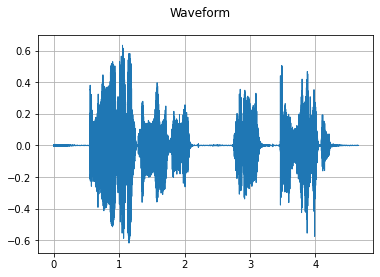

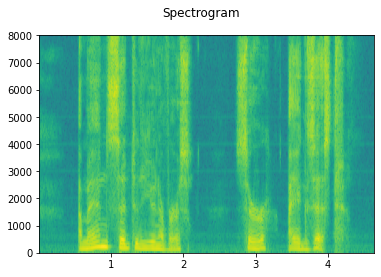

In [ ]:
print_stats(waveform, sample_rate=sample_rate)
plot_waveform(waveform, sample_rate)
plot_specgram(waveform, sample_rate)
play_audio(waveform, sample_rate)

In [ ]:
def plot_spectrogram(spec, title=None, ylabel='freq_bin', aspect='auto', xmax=None):
  fig, axs = plt.subplots(1, 1)
  axs.set_title(title or 'Spectrogram (db)')
  axs.set_ylabel(ylabel)
  axs.set_xlabel('frame')
  im = axs.imshow(librosa.power_to_db(spec), origin='lower', aspect=aspect)
  if xmax:
    axs.set_xlim((0, xmax))
  fig.colorbar(im, ax=axs)
  plt.show(block=False)

def plot_mel_fbank(fbank, title=None):
  fig, axs = plt.subplots(1, 1)
  axs.set_title(title or 'Filter bank')
  axs.imshow(fbank, aspect='auto')
  axs.set_ylabel('frequency bin')
  axs.set_xlabel('mel bin')
  plt.show(block=False)

def get_spectrogram(
    n_fft = 400,
    win_len = None,
    hop_len = None,
    power = 2.0,
):
  waveform, _ = get_speech_sample()
  spectrogram = T.Spectrogram(
      n_fft=n_fft,
      win_length=win_len,
      hop_length=hop_len,
      center=True,
      pad_mode="reflect",
      power=power,
  )
  return spectrogram(waveform)

Shape: (1, 513, 146)
Dtype: torch.float32
 - Max:     15662.462
 - Min:      0.000
 - Mean:     3.972
 - Std Dev: 107.619

tensor([[[7.7783e-03, 4.1892e-04, 4.4318e-06,  ..., 2.6876e-04,
          2.5402e-04, 7.5097e-03],
         [6.1395e-03, 8.7683e-04, 2.4934e-04,  ..., 2.5602e-03,
          6.8980e-04, 7.5960e-03],
         [8.6538e-05, 3.3344e-03, 1.3457e-03,  ..., 9.7246e-03,
          2.6626e-03, 5.4436e-03],
         ...,
         [1.2980e-05, 2.7531e-06, 7.9168e-06,  ..., 3.4680e-06,
          4.3299e-09, 8.7144e-06],
         [4.9473e-06, 1.7469e-06, 1.1022e-07,  ..., 2.7651e-06,
          1.3630e-07, 6.2227e-06],
         [1.1720e-10, 6.2334e-06, 1.8035e-06,  ..., 1.9665e-06,
          1.8461e-06, 1.1212e-07]]])



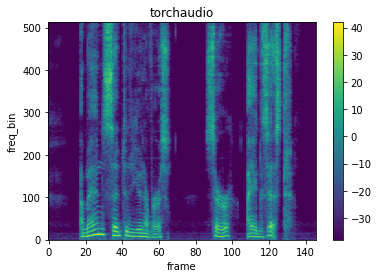

In [ ]:
# =========== #
# Spectrogram #

n_fft = 1024
win_length = None
hop_length = 512

# define transformation
spectrogram = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
)
# Perform transformation
spec = spectrogram(waveform)

print_stats(spec)
plot_spectrogram(spec[0], title='torchaudio')

/usr/local/lib/python3.7/dist-packages/torchaudio/functional/functional.py:358: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (64) may be set too high. Or, the value for `n_freqs` (129) may be set too low.
  "At least one mel filterbank has all zero values. "


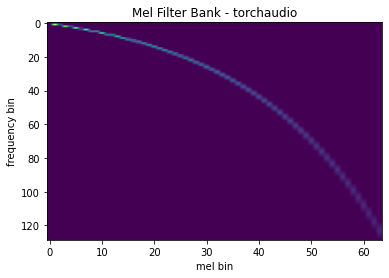

In [ ]:
# ======================= #
# Mel-Filter Bank (FBANK) #

n_fft = 256
n_mels = 64
sample_rate = 16000

mel_filters = F.create_fb_matrix(
    int(n_fft // 2 + 1),
    n_mels=n_mels,
    f_min=0.,
    f_max=sample_rate/2.,
    sample_rate=sample_rate,
    norm='slaney'
)
plot_mel_fbank(mel_filters, "Mel Filter Bank - torchaudio")

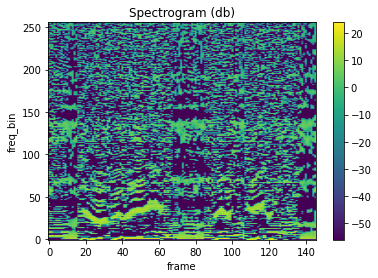

In [ ]:
# ====================================== #
# Mel-Filter Cepstral Coefficient (MFCC) #

n_fft = 2048
win_length = None # 25
hop_length = 512
n_mels = 256
n_mfcc = 256

mfcc_transform = T.MFCC(
    sample_rate=sample_rate,
    n_mfcc=n_mfcc, melkwargs={'n_fft': n_fft, 'n_mels': n_mels, 'hop_length': hop_length})

mfcc = mfcc_transform(waveform)

plot_spectrogram(mfcc[0])

##### Kaldi Features Extraction

Shape of spectrogram: torch.Size([371, 201])


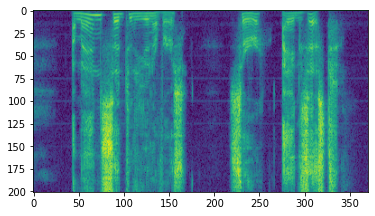

In [ ]:
""" Spectrogram """

n_fft = 400.0
frame_length = n_fft / sample_rate * 1000.0
frame_shift = frame_length / 2.0

params = {
    "channel": 0,
    "dither": 0.0,
    "window_type": "hanning",
    "frame_length": frame_length,
    "frame_shift": frame_shift,
    "remove_dc_offset": False,
    "round_to_power_of_two": False,
    "sample_frequency": sample_rate,
}

specgram = torchaudio.compliance.kaldi.spectrogram(waveform, **params)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
plt.imshow(specgram.t().numpy())

Shape of fbank: torch.Size([71, 65])


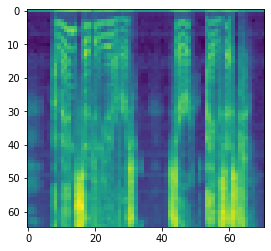

In [ ]:
""" FBANK """

n_fft = 2048 # 400.0
frame_length = n_fft / sample_rate * 1000.0
frame_shift = frame_length / 2.0

params = {
    "channel": 0,
    "dither": 0.0,
    "window_type": "hanning",
    "frame_length": frame_length,
    "frame_shift": frame_shift,
    "remove_dc_offset": False,
    "round_to_power_of_two": False,
    "sample_frequency": sample_rate,
    "num_mel_bins": 64,
    "use_energy":True
}

fbank = torchaudio.compliance.kaldi.fbank(waveform=waveform, **params)

print("Shape of fbank: {}".format(fbank.size()))

plt.figure()
plt.imshow(fbank.t().numpy())

Shape of mfcc: torch.Size([1313, 256])


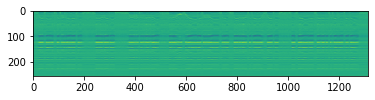

In [ ]:
""" MFCC """

n_fft = 2048 # 400.0
frame_length = n_fft / 16000 * 1000.0
frame_shift = frame_length / 2.0

params = {
    "channel": 0,
    "dither": 0.0,
    "window_type": "hanning",
    # "frame_length": frame_length,
    # "frame_shift": frame_shift,
    "remove_dc_offset": False,
    "round_to_power_of_two": False,
    "sample_frequency": 16000,
    "num_ceps": 256,
    "num_mel_bins": 256,
    "use_energy":True
}

mfcc = torchaudio.compliance.kaldi.mfcc(signal, **params) 

print("Shape of mfcc: {}".format(mfcc.size()))

plt.figure()
plt.imshow(mfcc.t().numpy())

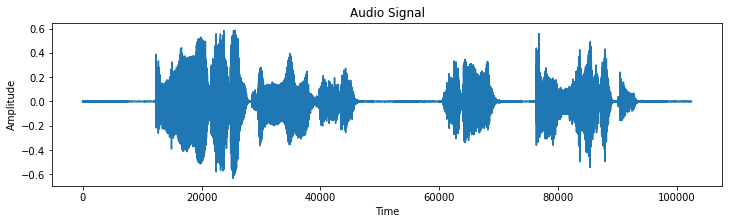

**Shape of Audio Signal** : (102533,)

**Transcript** : a man said to the universe sir i exist

In [ ]:
from IPython.display import Markdown, display
from IPython.display import Audio
%matplotlib inline

# plot audio signal
plot_raw_audio(vis_raw_audio)
# print length of audio signal
display(Markdown('**Shape of Audio Signal** : ' + str(vis_raw_audio.shape)))
# print transcript corresponding to audio clip
display(Markdown('**Transcript** : ' + str(vis_text)))
# play the audio file
Audio(vis_audio_path)

### 3.1 Data Generator and Viasualization

### 3.3 Utils

#### 3.2.2 Data Preprocessing

##### [torchaudio & speechbrain]

In [ ]:
class TextTransform:
    """Maps characters to integers and vice versa"""
    def __init__(self):
        char_map_str = """
        ' 0
        <SPACE> 1
        a 2
        b 3
        c 4
        d 5
        e 6
        f 7
        g 8
        h 9
        i 10
        j 11
        k 12
        l 13
        m 14
        n 15
        o 16
        p 17
        q 18
        r 19
        s 20
        t 21
        u 22
        v 23
        w 24
        x 25
        y 26
        z 27
        """
        self.char_map = {}
        self.index_map = {}
        for line in char_map_str.strip().split('\n'):
            ch, index = line.split()
            self.char_map[ch] = int(index)
            self.index_map[int(index)] = ch
        self.index_map[1] = ' '

    def text_to_int(self, text):
        """ Use a character map and convert text to an integer sequence """
        int_sequence = []
        for c in text:
            if c == ' ':
                ch = self.char_map['<SPACE>']
            else:
                ch = self.char_map[c]
            int_sequence.append(ch)
        return int_sequence

    def int_to_text(self, labels):
        """ Use a character map and convert integer labels to an text sequence """
        string = []
        for i in labels:
            string.append(self.index_map[i])
        return ''.join(string).replace('<SPACE>', ' ')


delta_transform = torchaudio.transforms.ComputeDeltas(25)

def quaternion_mfcc(feat, order=3):
  out = feat
  if order >= 1:
    delta = delta_transform(feat)
    out = torch.cat((feat, delta),dim=2)
    # print("out.shape: ", out.shape)

    if order >= 2:
      delta2 = delta_transform(delta)
      out = torch.cat((out, delta2),dim=2)

      if order >= 3:
        delta3 = delta_transform(delta2)
        out = torch.cat((out, delta3), dim=2)
  return out

##########
train_audio_transforms = nn.Sequential(
    torchaudio.transforms.MelSpectrogram(sample_rate=16000, n_mels=128),
    torchaudio.transforms.FrequencyMasking(freq_mask_param=30),
    torchaudio.transforms.TimeMasking(time_mask_param=100)
)

valid_audio_transforms = torchaudio.transforms.MelSpectrogram()
##########

n_fft = 2048      #1024
win_length = None #25
hop_length = 512  #128
n_mels = 160      #40
n_mfcc = 160      #40

train_transform_mfcc = torchaudio.transforms.MFCC(
    sample_rate=16000, n_mfcc=n_mfcc,
    melkwargs={'n_fft': n_fft, 'n_mels': n_mels, 'hop_length': hop_length}
    )

valid_transform_mfcc = torchaudio.transforms.MFCC(
    sample_rate=16000, n_mfcc=n_mfcc,
    melkwargs={'n_fft': n_fft, 'n_mels': n_mels, 'hop_length': hop_length}
    )

#############################################
# torchaudio.compilance.kaldi preprocessing #

def kaldi_transform(waveform):
  n_fft = 1024.0
  frame_length = n_fft / 16000 * 1000.0
  frame_shift = frame_length / 2.0

  params = {
      "channel": 0,
      "dither": 0.0,
      "window_type": "hanning",
      "frame_length": frame_length,
      "frame_shift": frame_shift,
      "remove_dc_offset": False,
      "round_to_power_of_two": False,
      "sample_frequency": 16000,
      "num_ceps": 40,
      "num_mel_bins": 40,
      "use_energy":True
  }
  
  mfcc = torchaudio.compliance.kaldi.mfcc(waveform, **params)

  return mfcc

#############################################


text_transform = TextTransform()

# ============================= #
# New Audio Features Extraction #

def mfcc_delta_feat(signal):
  compute_STFT = STFT(
     sample_rate=16000, win_length=25, hop_length=128, n_fft=400
  )
  features = compute_STFT(signal)
  features = spectral_magnitude(features)
  compute_fbanks = Filterbank(n_mels=40)
  features = compute_fbanks(features)
  compute_mfccs = DCT(input_size=40, n_out=20)
  features = compute_mfccs(features)

  compute_deltas = Deltas(input_size=20)
  delta1 = compute_deltas(features)
  delta2 = compute_deltas(delta1)
  features = torch.cat([features, delta1, delta2], dim=2)

  norm = InputNormalization()
  features = norm(features, torch.tensor([1]).float())

  return features

transform_sb = nn.Sequential(
    STFT(sample_rate=16000, win_length=25, hop_length=128, n_fft=400),
    Filterbank(n_mels=40),
    DCT(input_size=40, n_out=20)
)

compute_deltas = Deltas(input_size=20)



# ============================= #

def data_processing(data, data_type="train"):
    spectrograms = []
    labels = []
    input_lengths = []
    label_lengths = []
    for (waveform, _, utterance, _, _, _) in data:
        if data_type == 'train':
            # spec = train_transform_mfcc(waveform).squeeze(0).transpose(0, 1)
            spec = kaldi_transform(waveform) # mfcc_delta_feat(waveform).squeeze(0)
            ####print("spec.shape: ", spec.shape)
        elif data_type == 'valid':
            # spec = valid_transform_mfcc(waveform).squeeze(0).transpose(0, 1)
            spec = kaldi_transform(waveform) # mfcc_delta_feat(waveform).squeeze(0)
            ####print("spec.shape: ", spec.shape)
        else:
            raise Exception('data_type should be train or valid')
        spectrograms.append(spec)
        label = torch.Tensor(text_transform.text_to_int(utterance.lower()))
        labels.append(label)
        input_lengths.append(spec.shape[0]//2)
        label_lengths.append(len(label))

    spectrograms = nn.utils.rnn.pad_sequence(spectrograms, batch_first=True).transpose(1, 2)
    # spectrograms = nn.utils.rnn.pad_sequence(spectrograms, batch_first=True)

    #### Quaternions ####
    #delta1 = compute_deltas(spectrograms)
    #delta2 = compute_deltas(delta1)
    #features = torch.cat([spectrograms, delta1, delta2], dim=2)
    ####

    labels = nn.utils.rnn.pad_sequence(labels, batch_first=True)

    #return features, labels, input_lengths, label_lengths
    return spectrograms, labels, input_lengths, label_lengths

/usr/local/lib/python3.7/dist-packages/torchaudio/functional/functional.py:358: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  "At least one mel filterbank has all zero values. "


#### 3.3.2 Training / Evaluation

In [ ]:
class IterMeter(object):
    """keeps track of total iterations"""
    def __init__(self):
        self.val = 0

    def step(self):
        self.val += 1

    def get(self):
        return self.val


def training_loop(model, device, train_loader, criterion, optimizer, epochs, path_to_save):

    for epoch in range(epochs):

        progress_bar = tqdm()

        # batches of the training set
        for batch_idx, _data in enumerate(train_loader):

            spectrograms, labels, input_lengths, label_lengths = _data 
            spectrograms, labels = spectrograms.to(device), labels.to(device)

            optimizer.zero_grad()

            output = model(spectrograms)  # (batch, time, n_class)
            output = F.log_softmax(output, dim=2)
            output = output.transpose(0, 1) # (time, batch, n_class)

            loss = criterion(output, labels, input_lengths, label_lengths)

            # computes the gradient of the loss
            loss.backward()
            # updates parameters based on the gradient information
            optimizer.step()

            progress_bar.update()
            progress_bar.set_postfix(epoch=epoch, loss=loss.item())
        
        progress_bar.close()


def train(model, device, train_loader, criterion, optimizer, scheduler, epoch, iter_meter, experiment, path_to_save):
    model.train()
    data_len = len(train_loader.dataset)
    with experiment.train():
        for batch_idx, _data in enumerate(train_loader):
            spectrograms, labels, input_lengths, label_lengths = _data 
            spectrograms, labels = spectrograms.to(device), labels.to(device)

            optimizer.zero_grad()

            output = model(spectrograms)  # (batch, time, n_class)
            output = F.log_softmax(output, dim=2)
            output = output.transpose(0, 1) # (time, batch, n_class)

            loss = criterion(output, labels, input_lengths, label_lengths)
            loss.backward()

            experiment.log_metric('loss', loss.item(), step=iter_meter.get())
            experiment.log_metric('learning_rate', scheduler.get_lr(), step=iter_meter.get())

            optimizer.step()
            scheduler.step()
            iter_meter.step()
            if batch_idx == data_len or batch_idx % 100 == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(spectrograms), data_len,
                    100. * batch_idx / len(train_loader), loss.item()))
                
                # Save model state
                torch.save(model.state_dict(), os.path.join(path_to_save, "state_dict.pth"))
                # Save model
                torch.save(model, os.path.join(path_to_save, "model.pth"))


def train_progressbar(model, device, train_loader, criterion, optimizer, scheduler, epoch, iter_meter, experiment, path_to_save):

    data_len = len(train_loader.dataset)
    running_loss = 0.0

    model.train()
    # with experiment.train():

    progress_bar = tqdm()

    # batches of the training set
    for batch_idx, _data in enumerate(train_loader):
        spectrograms, labels, input_lengths, label_lengths = _data
        spectrograms, labels = spectrograms.to(device), labels.to(device)

        optimizer.zero_grad()

        output = model(spectrograms)  # (batch, time, n_class)
        output = F.log_softmax(output, dim=2)
        output = output.transpose(0, 1) # (time, batch, n_class)

        loss = criterion(output, labels, input_lengths, label_lengths)
        loss.backward()

        # experiment.log_metric('loss', loss.item(), step=iter_meter.get())
        # experiment.log_metric('learning_rate', scheduler.get_lr(), step=iter_meter.get())

        optimizer.step()
        running_loss += loss.item()

        # scheduler.step()
        # iter_meter.step()

        
        if batch_idx % 100 == 0 or batch_idx == data_len:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(spectrograms), data_len,
                100. * batch_idx / len(train_loader), loss.item()))
        

        if batch_idx % 100:  # every 100 mini-batches...
          # ...log the running loss
          writer.add_scalar('training loss',
                            running_loss / 100,
                            epoch * len(train_loader) + batch_idx)
          running_loss = 0.0

        progress_bar.update()
        progress_bar.set_postfix(epoch=epoch, loss=loss.item())
    
    # Save model state
    torch.save(model.state_dict(), os.path.join(path_to_save, "state_dict.pth"))
    # Save model
    torch.save(model, os.path.join(path_to_save, "model.pth"))

    progress_bar.close()


def test(model, device, test_loader, criterion, epoch, iter_meter, experiment):
    print('\nevaluating...')
    model.eval()
    test_loss = 0
    test_cer, test_wer = [], []
    with experiment.test():
        with torch.no_grad():
            for i, _data in enumerate(test_loader):
                spectrograms, labels, input_lengths, label_lengths = _data 
                spectrograms, labels = spectrograms.to(device), labels.to(device)

                output = model(spectrograms)  # (batch, time, n_class)
                output = F.log_softmax(output, dim=2)
                output = output.transpose(0, 1) # (time, batch, n_class)

                loss = criterion(output, labels, input_lengths, label_lengths)
                test_loss += loss.item() / len(test_loader)

                decoded_preds, decoded_targets = GreedyDecoder(output.transpose(0, 1), labels, label_lengths)
                for j in range(len(decoded_preds)):
                    test_cer.append(cer(decoded_targets[j], decoded_preds[j]))
                    test_wer.append(wer(decoded_targets[j], decoded_preds[j]))


    avg_cer = sum(test_cer)/len(test_cer)
    avg_wer = sum(test_wer)/len(test_wer)
    experiment.log_metric('test_loss', test_loss, step=iter_meter.get())
    experiment.log_metric('cer', avg_cer, step=iter_meter.get())
    experiment.log_metric('wer', avg_wer, step=iter_meter.get())

    print('Test set: Average loss: {:.4f}, Average CER: {:4f} Average WER: {:.4f}\n'.format(test_loss, avg_cer, avg_wer))


def GreedyDecoder(output, labels, label_lengths, blank_label=28, collapse_repeated=True):
	arg_maxes = torch.argmax(output, dim=2)
	decodes = []
	targets = []
	for i, args in enumerate(arg_maxes):
		decode = []
		targets.append(text_transform.int_to_text(labels[i][:label_lengths[i]].tolist()))
		for j, index in enumerate(args):
			if index != blank_label:
				if collapse_repeated and j != 0 and index == args[j -1]:
					continue
				decode.append(index.item())
		decodes.append(text_transform.int_to_text(decode))
	return decodes, targets


#### 3.3.3 Model Evaluation

In [ ]:
def avg_wer(wer_scores, combined_ref_len):
    return float(sum(wer_scores)) / float(combined_ref_len)


def _levenshtein_distance(ref, hyp):
    """Levenshtein distance is a string metric for measuring the difference
    between two sequences.
    """
    m = len(ref)
    n = len(hyp)

    # special case
    if ref == hyp:
        return 0
    if m == 0:
        return n
    if n == 0:
        return m

    if m < n:
        ref, hyp = hyp, ref
        m, n = n, m

    # use O(min(m, n)) space
    distance = np.zeros((2, n + 1), dtype=np.int32)

    # initialize distance matrix
    for j in range(0,n + 1):
        distance[0][j] = j

    # calculate levenshtein distance
    for i in range(1, m + 1):
        prev_row_idx = (i - 1) % 2
        cur_row_idx = i % 2
        distance[cur_row_idx][0] = i
        for j in range(1, n + 1):
            if ref[i - 1] == hyp[j - 1]:
                distance[cur_row_idx][j] = distance[prev_row_idx][j - 1]
            else:
                s_num = distance[prev_row_idx][j - 1] + 1
                i_num = distance[cur_row_idx][j - 1] + 1
                d_num = distance[prev_row_idx][j] + 1
                distance[cur_row_idx][j] = min(s_num, i_num, d_num)

    return distance[m % 2][n]


def word_errors(reference, hypothesis, ignore_case=False, delimiter=' '):
    """Compute the levenshtein distance between reference sequence and
    hypothesis sequence in word-level.
    """
    if ignore_case == True:
        reference = reference.lower()
        hypothesis = hypothesis.lower()

    ref_words = reference.split(delimiter)
    hyp_words = hypothesis.split(delimiter)

    edit_distance = _levenshtein_distance(ref_words, hyp_words)
    return float(edit_distance), len(ref_words)


def char_errors(reference, hypothesis, ignore_case=False, remove_space=False):
    """Compute the levenshtein distance between reference sequence and
    hypothesis sequence in char-level.
    """
    if ignore_case == True:
        reference = reference.lower()
        hypothesis = hypothesis.lower()

    join_char = ' '
    if remove_space == True:
        join_char = ''

    reference = join_char.join(filter(None, reference.split(' ')))
    hypothesis = join_char.join(filter(None, hypothesis.split(' ')))

    edit_distance = _levenshtein_distance(reference, hypothesis)
    return float(edit_distance), len(reference)


def wer(reference, hypothesis, ignore_case=False, delimiter=' '):
    """Calculate word error rate (WER). WER compares reference text and
    hypothesis text in word-level.
    """

    edit_distance, ref_len = word_errors(reference, hypothesis, ignore_case,
                                         delimiter)

    if ref_len == 0:
        raise ValueError("Reference's word number should be greater than 0.")

    wer = float(edit_distance) / ref_len
    return wer


def cer(reference, hypothesis, ignore_case=False, remove_space=False):
    """Calculate charactor error rate (CER). CER compares reference text and
    hypothesis text in char-level.
    """
    edit_distance, ref_len = char_errors(reference, hypothesis, ignore_case,
                                         remove_space)

    if ref_len == 0:
        raise ValueError("Length of reference should be greater than 0.")

    cer = float(edit_distance) / ref_len
    return cer

### 3.4 Models

#### 3.4.1 Residual-Convolutional Recurrent Network (ResCRNN) Model

#### [**old version**]

In [ ]:
class CNNLayerNorm(nn.Module):
    """Layer normalization built for cnns input"""
    def __init__(self, n_feats):
        super(CNNLayerNorm, self).__init__()
        self.layer_norm = nn.LayerNorm(n_feats)

    def forward(self, x):
        # x (batch, channel, feature, time)
        x = x.transpose(2, 3).contiguous() # (batch, channel, time, feature)
        x = self.layer_norm(x)
        return x.transpose(2, 3).contiguous() # (batch, channel, feature, time) 


class ResidualCNN(nn.Module):
    """Residual CNN inspired by https://arxiv.org/pdf/1603.05027.pdf
        except with layer norm instead of batch norm
    """
    def __init__(self, in_channels, out_channels, kernel, stride, dropout, n_feats):
        super(ResidualCNN, self).__init__()

        self.cnn1 = nn.Conv2d(in_channels, out_channels, kernel, stride, padding=kernel//2)
        self.cnn2 = nn.Conv2d(out_channels, out_channels, kernel, stride, padding=kernel//2)
        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)
        self.layer_norm1 = CNNLayerNorm(n_feats)
        self.layer_norm2 = CNNLayerNorm(n_feats)

    def forward(self, x):
        residual = x  # (batch, channel, feature, time)
        x = self.layer_norm1(x)
        x = F.gelu(x)
        x = self.dropout1(x)
        x = self.cnn1(x)
        x = self.layer_norm2(x)
        x = F.gelu(x)
        x = self.dropout2(x)
        x = self.cnn2(x)
        x += residual
        return x # (batch, channel, feature, time)


class BidirectionalGRU(nn.Module):

    def __init__(self, rnn_dim, hidden_size, dropout, batch_first):
        super(BidirectionalGRU, self).__init__()

        self.BiGRU = nn.GRU(
            input_size=rnn_dim, hidden_size=hidden_size,
            num_layers=1, batch_first=batch_first, bidirectional=True)
        self.layer_norm = nn.LayerNorm(rnn_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = self.layer_norm(x)
        x = F.gelu(x)
        x, _ = self.BiGRU(x)
        x = self.dropout(x)
        return x


class SpeechRecognitionModel(nn.Module):
    
    def __init__(self, n_cnn_layers, n_rnn_layers, rnn_dim, n_class, n_feats, stride=2, dropout=0.1):
        super(SpeechRecognitionModel, self).__init__()
        n_feats = n_feats//2
        self.cnn = nn.Conv2d(1, 32, 3, stride=stride, padding=3//2)  # cnn for extracting heirachal features

        # n residual cnn layers with filter size of 32
        self.rescnn_layers = nn.Sequential(*[
            ResidualCNN(32, 32, kernel=3, stride=1, dropout=dropout, n_feats=n_feats) 
            for _ in range(n_cnn_layers)
        ])
        self.fully_connected = nn.Linear(n_feats*32, rnn_dim)
        self.birnn_layers = nn.Sequential(*[
            BidirectionalGRU(rnn_dim=rnn_dim if i==0 else rnn_dim*2,
                             hidden_size=rnn_dim, dropout=dropout, batch_first=i==0)
            for i in range(n_rnn_layers)
        ])
        self.classifier = nn.Sequential(
            nn.Linear(rnn_dim*2, rnn_dim),  # birnn returns rnn_dim*2
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(rnn_dim, n_class)
        )

    def forward(self, x):
        x = self.cnn(x)
        x = self.rescnn_layers(x)
        sizes = x.size()
        x = x.view(sizes[0], sizes[1] * sizes[2], sizes[3])  # (batch, feature, time)
        x = x.transpose(1, 2) # (batch, time, feature)
        x = self.fully_connected(x)
        x = self.birnn_layers(x)
        x = self.classifier(x)
        return x

#### [**new version**] Conv-2D

In [ ]:
class CNNLayerNorm(nn.Module):
    """Layer normalization built for cnns input"""
    def __init__(self, n_feats, quaternion):
        #### print("Norm(n_feats): ", n_feats)
        super(CNNLayerNorm, self).__init__()
        if quaternion:
          self.layer_norm = QuaternionBatchNorm2d(n_feats) # QBatchNorm(n_feats)
        else:
          self.layer_norm = LayerNorm(n_feats)

    def forward(self, x):
        #### print("Norm(start): ", x.shape)

        # x (batch, channel, feature, time)
        x = x.transpose(1, 2).contiguous() # x = x.transpose(2, 3).contiguous()
        # (batch, feature, channel, feature)
        x = self.layer_norm(x)
        # (batch, channel, feature, time)
        x = x.transpose(1, 2).contiguous() # x.transpose(2, 3).contiguous()

        #### print("Norm(end): ", x.shape)
        return x

class ResidualCNN(nn.Module):
    """Residual CNN inspired by https://arxiv.org/pdf/1603.05027.pdf
        except with layer norm instead of batch norm
    """
    def __init__(self, in_channels, out_channels, kernel, stride, dropout, n_feats, quaternion):
        super(ResidualCNN, self).__init__()

        if quaternion:
          # self.cnn1 = QConv2d(out_channels=in_channels, kernel_size=kernel, input_shape=(None,None,None,128), stride=stride, padding=kernel//2)
          # self.cnn2 = QConv2d(out_channels=out_channels, kernel_size=kernel, input_shape=(None,None,None,128), stride=stride, padding=kernel//2)
          self.cnn1 = QuaternionConv(in_channels, out_channels, kernel, stride, padding=kernel//2)
          self.cnn2 = QuaternionConv(out_channels, out_channels, kernel, stride, padding=kernel//2)
          self.dropout1 = Dropout(dropout)
          self.dropout2 = Dropout(dropout)
          self.layer_norm1 = CNNLayerNorm(n_feats, quaternion)
          self.layer_norm2 = CNNLayerNorm(n_feats, quaternion)

        else:
          self.cnn1 = Conv2d(in_channels, out_channels, kernel, stride, padding=kernel//2)
          self.cnn2 = Conv2d(out_channels, out_channels, kernel, stride, padding=kernel//2)
          self.dropout1 = Dropout(dropout)
          self.dropout2 = Dropout(dropout)
          self.layer_norm1 = CNNLayerNorm(n_feats, quaternion)
          self.layer_norm2 = CNNLayerNorm(n_feats, quaternion)

    def forward(self, x):
        #### print("ResCNN(start): ", x.shape)
        residual = x  # (batch, channel, feature, time)
        x = self.layer_norm1(x)
        x = F.gelu(x)
        x = self.dropout1(x)
        x = self.cnn1(x)
        x = self.layer_norm2(x)
        x = F.gelu(x)
        x = self.dropout2(x)
        x = self.cnn2(x)
        x += residual
        #### print("ResCNN(end): ", x.shape)
        return x # (batch, channel, feature, time)

class BidirectionalGRU(nn.Module):

    def __init__(self, rnn_dim, hidden_size, dropout, batch_first, quaternion):
        super(BidirectionalGRU, self).__init__()

        if quaternion:
          self.BiGRU = QLiGRU_Layer( # qnn.LiGRU
              input_size=rnn_dim, hidden_size=hidden_size, batch_size=20,
              num_layers=1, bidirectional=True
          )
          # self.layer_norm = QuaternionBatchNorm2d(rnn_dim) # QBatchNorm(rnn_dim)
        else:
          self.BiGRU = GRU(
              input_size=rnn_dim, hidden_size=hidden_size,
              num_layers=1, batch_first=batch_first, bidirectional=True
          )
          # self.layer_norm = LayerNorm(rnn_dim)
          
        self.dropout = Dropout(dropout)
        self.quaternion = quaternion
    def forward(self, x):
        #### print("BiRNN(start): ", x.shape)

        # x = self.layer_norm(x)
        # x = F.gelu(x)
        if self.quaternion:
          x = self.BiGRU(x)
        else:
          x, _ = self.BiGRU(x)
        x = self.dropout(x)
        
        #### print("BiRNN(end): ", x.shape)
        return x

class SpeechRecognitionModel(nn.Module):
    
    def __init__(self, quaternion, n_cnn_layers, n_rnn_layers, rnn_dim, n_class, n_feats, stride=2, dropout=0.1):
        super(SpeechRecognitionModel, self).__init__()
        # n_feats = n_feats//2

        if quaternion:
          self.cnn = QuaternionConv(4, 128, 3, stride=stride, padding=3//2)  # cnn for extracting heirachal features
        else:
          self.cnn = Conv2d(1, 32, 3, stride=stride, padding=3//2)  # cnn for extracting heirachal features

        # n residual cnn layers with filter size of 32
        self.rescnn_layers = nn.Sequential(*[
            ResidualCNN(in_channels=128,
                        out_channels=128,
                        kernel=3,
                        stride=1,
                        dropout=dropout,
                        n_feats=n_feats//2,
                        quaternion=quaternion) 
            
            for _ in range(n_cnn_layers)
        ])
        if quaternion:
          self.fully_connected = QuaternionLinearAutograd(n_feats*(128//2), rnn_dim)
        else:
          self.fully_connected = nn.Linear(n_feats*32, rnn_dim)

        
        self.birnn_layers = nn.Sequential(*[
                          BidirectionalGRU(rnn_dim=rnn_dim if i==0 else rnn_dim*2,
                               hidden_size=rnn_dim, dropout=dropout, batch_first=i==0,
                               quaternion=quaternion)
                          for i in range(n_rnn_layers)
                          ])
        
        self.classifier = nn.Sequential(
            Linear(rnn_dim*2, rnn_dim),  # birnn returns rnn_dim*2
            GELU(),
            Dropout(dropout),
            Linear(rnn_dim, n_class)
        )

    def forward(self, x):
        #### print("1) input: ", x.shape)
        x = self.cnn(x)
        
        #### print("2) cnn: ", x.shape)
        x = self.rescnn_layers(x)
        
        #### print("3) rescnn: ", x.shape)
        sizes = x.size()
        # (batch, feature, time)
        x = torch.reshape(x, (sizes[0], sizes[1] * sizes[2], sizes[3])) # x.view(sizes[0], sizes[1] * sizes[2], sizes[3])
        x = x.transpose(1, 2) # (batch, time, feature)
        
        #### print("4-5) reshape-transpose: ", x.shape)
        x = self.fully_connected(x)
        
        #### print("6) fc: ", x.shape)
        x = self.birnn_layers(x)
        
        #### print("7) birnn: ", x.shape)
        x = self.classifier(x)
        
        #### print("8) classifier: ", x.shape)
        return x

#### [**old version**] Conv-1D

In [ ]:
class CNNLayerNorm(nn.Module):
    """Layer normalization built for cnns input"""
    def __init__(self, n_feats, quaternion):
        print("Norm(n_feats): ", n_feats)
        super(CNNLayerNorm, self).__init__()
        if quaternion:
          self.layer_norm = QuaternionBatchNorm2d(n_feats) # QBatchNorm(n_feats)
        else:
          self.layer_norm = LayerNorm(n_feats)

    def forward(self, x):
        #### print("Norm(start): ", x.shape)
        # x (batch, channel, feature, time)
        x = x.unsqueeze(0)
        x = x.transpose(1, 2).contiguous() # x = x.transpose(2, 3).contiguous()
        #### print(x.shape)
        # (batch, feature, channel, feature)
        x = self.layer_norm(x)
        # (batch, channel, feature, time)
        x = x.transpose(1, 2).contiguous() # x.transpose(2, 3).contiguous()
        x = x.squeeze(0)
        #### print("Norm(end): ", x.shape)
        return x

class ResidualCNN(nn.Module):
    """Residual CNN inspired by https://arxiv.org/pdf/1603.05027.pdf
        except with layer norm instead of batch norm
    """
    def __init__(self, in_channels, out_channels, kernel, stride, dropout, n_feats, quaternion):
        super(ResidualCNN, self).__init__()

        if quaternion:
          # self.cnn1 = QConv2d(out_channels=in_channels, kernel_size=kernel, input_shape=(None,None,None,128), stride=stride, padding=kernel//2)
          # self.cnn2 = QConv2d(out_channels=out_channels, kernel_size=kernel, input_shape=(None,None,None,128), stride=stride, padding=kernel//2)
          self.cnn1 = QuaternionConv(in_channels, out_channels, kernel, stride, padding=kernel//2,
                                     operation='convolution1d')
          self.cnn2 = QuaternionConv(out_channels, out_channels, kernel, stride, padding=kernel//2,
                                     operation='convolution1d')
          self.dropout1 = Dropout(dropout)
          self.dropout2 = Dropout(dropout)
          self.layer_norm1 = CNNLayerNorm(n_feats, quaternion)
          self.layer_norm2 = CNNLayerNorm(n_feats, quaternion)

        else:
          self.cnn1 = Conv1d(in_channels, out_channels, kernel, stride, padding=kernel//2)
          self.cnn2 = Conv1d(out_channels, out_channels, kernel, stride, padding=kernel//2)
          self.dropout1 = Dropout(dropout)
          self.dropout2 = Dropout(dropout)
          self.layer_norm1 = CNNLayerNorm(n_feats, quaternion)
          self.layer_norm2 = CNNLayerNorm(n_feats, quaternion)

    def forward(self, x):
        #### print("ResCNN(start): ", x.shape)
        residual = x  # (batch, channel, feature, time)
        x = self.layer_norm1(x)
        x = F.gelu(x)
        x = self.dropout1(x)
        x = self.cnn1(x)
        x = self.layer_norm2(x)
        x = F.gelu(x)
        x = self.dropout2(x)
        x = self.cnn2(x)
        x += residual
        #### print("ResCNN(end): ", x.shape)
        return x # (batch, channel, feature, time)

class BidirectionalGRU(nn.Module):

    def __init__(self, rnn_dim, hidden_size, dropout, batch_first, quaternion):
        super(BidirectionalGRU, self).__init__()

        if quaternion:
          self.BiGRU = QLiGRU_Layer( # qnn.LiGRU
              input_size=rnn_dim, hidden_size=hidden_size, batch_size=10,
              num_layers=1, bidirectional=True
          )
          # self.layer_norm = QuaternionBatchNorm2d(rnn_dim) # QBatchNorm(rnn_dim)
        else:
          self.BiGRU = GRU(
              input_size=rnn_dim, hidden_size=hidden_size,
              num_layers=1, batch_first=batch_first, bidirectional=True
          )
          # self.layer_norm = LayerNorm(rnn_dim)
          
        self.dropout = Dropout(dropout)
        self.quaternion = quaternion
    def forward(self, x):
        #### print("BiRNN(start): ", x.shape)
        # x = self.layer_norm(x)
        # x = F.gelu(x)
        if self.quaternion:
          x = self.BiGRU(x)
        else:
          x, _ = self.BiGRU(x)
        x = self.dropout(x)
        #### print("BiRNN(end): ", x.shape)
        return x

class SpeechRecognitionModel(nn.Module):
    
    def __init__(self, quaternion, n_cnn_layers, n_rnn_layers, rnn_dim, n_class, n_feats, stride=2, dropout=0.1):
        super(SpeechRecognitionModel, self).__init__()
        # n_feats = n_feats//2

        if quaternion:
          self.cnn = QuaternionConv(256, 128, 3, stride=stride, padding=3//2, operation='convolution1d')  # cnn for extracting heirachal features
        else:
          self.cnn = Conv2d(1, 32, 3, stride=stride, padding=3//2)  # cnn for extracting heirachal features

        # n residual cnn layers with filter size of 32
        self.rescnn_layers = nn.Sequential(*[
            ResidualCNN(in_channels=128,
                        out_channels=128,
                        kernel=3,
                        stride=1,
                        dropout=dropout,
                        n_feats=n_feats,
                        quaternion=quaternion) 
            
            for _ in range(n_cnn_layers)
        ])
        if quaternion:
          self.fully_connected = QuaternionLinearAutograd(n_feats, rnn_dim)
        else:
          self.fully_connected = nn.Linear(n_feats*32, rnn_dim)

        
        self.birnn_layers = nn.Sequential(*[
                          BidirectionalGRU(rnn_dim=rnn_dim if i==0 else rnn_dim*2,
                               hidden_size=rnn_dim, dropout=dropout, batch_first=i==0,
                               quaternion=quaternion)
                          for i in range(n_rnn_layers)
                          ])
        
        self.classifier = nn.Sequential(
            Linear(rnn_dim*2, rnn_dim),  # birnn returns rnn_dim*2
            GELU(),
            Dropout(dropout),
            Linear(rnn_dim, n_class)
        )

    def forward(self, x):
        #### print("1) input: ", x.shape)
        x = self.cnn(x)
        
        #### print("2) cnn: ", x.shape)
        x = self.rescnn_layers(x)
        
        #### print("3) rescnn: ", x.shape)
        sizes = x.size()      # (batch, feature, time)
        x = x.transpose(1, 2) # (batch, time, feature)
        
        #### print("4-5) reshape-transpose: ", x.shape)
        x = self.fully_connected(x)
        
        #### print("6) fc: ", x.shape)
        x = self.birnn_layers(x)
        
        #### print("7) birnn: ", x.shape)
        x = self.classifier(x)
        
        #### print("8) classifier: ", x.shape)
        return x

#### [**new version-(Orkis Library)**] - **Conv-1D**

In [ ]:
class CNNLayerNorm(nn.Module):
    """Layer normalization built for cnns input"""
    def __init__(self, n_feats, quaternion):
        #print("Norm(n_feats): ", n_feats)
        super(CNNLayerNorm, self).__init__()
        if quaternion:
          self.layer_norm = QuaternionBatchNorm2d(n_feats) # QBatchNorm(n_feats)
        else:
          self.layer_norm = LayerNorm(n_feats)

    def forward(self, x):
        #print("Norm(start): ", x.shape)
        # x (batch, channel, feature, time)
        x = x.unsqueeze(0)
        x = x.transpose(1, 2).contiguous() # x = x.transpose(2, 3).contiguous()
        #print(x.shape)
        # (batch, feature, channel, feature)
        x = self.layer_norm(x)
        # (batch, channel, feature, time)
        x = x.transpose(1, 2).contiguous() # x.transpose(2, 3).contiguous()
        x = x.squeeze(0)
        #print("Norm(end): ", x.shape)
        return x

class ResidualCNN(nn.Module):
    """Residual CNN inspired by https://arxiv.org/pdf/1603.05027.pdf
        except with layer norm instead of batch norm
    """
    def __init__(self, in_channels, out_channels, kernel, stride, dropout, n_feats, quaternion):
        super(ResidualCNN, self).__init__()

        if quaternion:
          # self.cnn1 = QConv2d(out_channels=in_channels, kernel_size=kernel, input_shape=(None,None,None,128), stride=stride, padding=kernel//2)
          # self.cnn2 = QConv2d(out_channels=out_channels, kernel_size=kernel, input_shape=(None,None,None,128), stride=stride, padding=kernel//2)
          self.cnn1 = QuaternionConv(in_channels, out_channels, kernel, stride, padding=kernel//2,
                                     operation='convolution1d')
          self.cnn2 = QuaternionConv(out_channels, out_channels, kernel, stride, padding=kernel//2,
                                     operation='convolution1d')
          self.dropout1 = Dropout(dropout)
          self.dropout2 = Dropout(dropout)
          #### self.layer_norm1 = CNNLayerNorm(n_feats, quaternion)
          #### self.layer_norm2 = CNNLayerNorm(n_feats, quaternion)

        else:
          self.cnn1 = nn.Conv1d(in_channels, out_channels, kernel, stride, padding=kernel//2)
          self.cnn2 = nn.Conv1d(out_channels, out_channels, kernel, stride, padding=kernel//2)
          self.dropout1 = Dropout(dropout)
          self.dropout2 = Dropout(dropout)
          self.layer_norm1 = CNNLayerNorm(n_feats, quaternion)
          self.layer_norm2 = CNNLayerNorm(n_feats, quaternion)

    def forward(self, x):
        #print("ResCNN(start): ", x.shape)
        residual = x  # (batch, channel, feature, time)
        #x = self.layer_norm1(x)
        #x = F.gelu(x)
        x = self.dropout1(x)
        x = self.cnn1(x)
        #x = self.layer_norm2(x)
        x = F.gelu(x)
        x = self.dropout2(x)
        x = self.cnn2(x)
        x += residual
        #print("ResCNN(end): ", x.shape)
        return x # (batch, channel, feature, time)

class BidirectionalGRU(nn.Module):

    def __init__(self, rnn_dim, hidden_size, dropout, batch_first, quaternion):
        super(BidirectionalGRU, self).__init__()

        if quaternion:
          self.BiGRU = QLiGRU_Layer( # qnn.LiGRU
              input_size=rnn_dim, hidden_size=hidden_size, batch_size=10,
              num_layers=1, bidirectional=True
          )
          # self.layer_norm = QuaternionBatchNorm2d(rnn_dim) # QBatchNorm(rnn_dim)
        else:
          self.BiGRU = nn.GRU(
              input_size=rnn_dim, hidden_size=hidden_size,
              num_layers=1, batch_first=batch_first, bidirectional=True
          )
          # self.layer_norm = LayerNorm(rnn_dim)
          
        self.dropout = Dropout(dropout)
        self.quaternion = quaternion
    def forward(self, x):
        #print("BiRNN(start): ", x.shape)
        
        # x = self.layer_norm(x)
        # x = F.gelu(x)
        if self.quaternion:
          x = self.BiGRU(x)
        else:
          x, _ = self.BiGRU(x)
        x = self.dropout(x)
        
        #print("BiRNN(end): ", x.shape)
        return x

class SpeechRecognitionModel(nn.Module):
    
    def __init__(self, quaternion, n_cnn_layers, n_rnn_layers, rnn_dim, n_class, n_feats, stride=2, dropout=0.1):
        super(SpeechRecognitionModel, self).__init__()
        # n_feats = n_feats//2

        if quaternion:
          self.cnn = QuaternionConv(40, 128, 3, stride=stride, padding=3//2, operation='convolution1d')  # cnn for extracting heirachal features
        else:
          self.cnn = nn.Conv1d(128, 64, 3, stride=stride, padding=3//2)  # cnn for extracting heirachal features

        # n residual cnn layers with filter size of 32
        self.rescnn_layers = nn.Sequential(*[
            ResidualCNN(in_channels = 128 if quaternion else 64,
                        out_channels = 128 if quaternion else 64,
                        kernel=3,
                        stride=1,
                        dropout=dropout,
                        n_feats=n_feats,
                        quaternion=quaternion) 
            
            for _ in range(n_cnn_layers)
        ])
        if quaternion:
          self.fully_connected = QuaternionLinearAutograd(n_feats, rnn_dim)
        else:
          self.fully_connected = nn.Linear(n_feats*32, rnn_dim)

        
        self.birnn_layers = nn.Sequential(*[
                          BidirectionalGRU(rnn_dim=rnn_dim if i==0 else rnn_dim*2,
                               hidden_size=rnn_dim, dropout=dropout, batch_first=i==0,
                               quaternion=quaternion)
                          for i in range(n_rnn_layers)
                          ])
        
        self.classifier = nn.Sequential(
            Linear(rnn_dim*2, rnn_dim),  # birnn returns rnn_dim*2
            GELU(),
            Dropout(dropout),
            Linear(rnn_dim, n_class)
        )

    def forward(self, x):
        #print("1) input: ", x.shape)
        x = self.cnn(x)
        #print("2) cnn: ", x.shape)
        x = self.rescnn_layers(x)
        #print("3) rescnn: ", x.shape)
        sizes = x.size()      # (batch, feature, time)
        x = x.transpose(1, 2) # (batch, time, feature)
        #print("4-5) reshape-transpose: ", x.shape)
        x = self.fully_connected(x)
        #print("6) fc: ", x.shape)
        x = self.birnn_layers(x)
        #print("7) birnn: ", x.shape)
        x = self.classifier(x)
        #print("8) classifier: ", x.shape)
        return x

In [ ]:
x = torch.rand([10, 10, 60])

In [ ]:
conv = QConv1d(out_channels=32, kernel_size=3, input_shape=(None,None,60))
y = conv(x)
print(y.shape)

torch.Size([10, 831, 128])


In [ ]:
b_norm = QBatchNorm(input_size=60, dim=1)
y = b_norm(x)
print(y.shape)

In [ ]:
conv2 = QConv1d(out_channels=64, kernel_size=3, input_shape=(None,None,conv.out_channels*4))
y = conv(x)
z = conv2(y)
print(z.shape)

torch.Size([10, 831, 256])


In [ ]:
## Test:
x = torch.rand([10, 40, 591])
rescrnn_model = SpeechRecognitionModel(True, 2, 2, 512, 29, 128, 2, 0.1)
y = rescrnn_model(x)
print(y.shape)

torch.Size([10, 296, 29])


#### [**new version-(Speechbrain Library)**] - **Conv-1D**

In [ ]:
x = torch.rand([10, 513, 60])
x = x.unsqueeze(-1)
x = x.transpose(1,2)
print(x.shape)
norm_layer = QuaternionBatchNorm2d(60)
y = norm_layer(x)
y = y.transpose(1,2).squeeze(-1)
print(y.shape)

torch.Size([10, 60, 513, 1])
torch.Size([10, 513, 60])


In [ ]:
class CNNLayerNormSB(nn.Module):
    """Layer normalization built for cnns input"""
    def __init__(self, n_feats, quaternion):
        #print("Norm(n_feats): ", n_feats)
        super(CNNLayerNormSB, self).__init__()
        if quaternion:
          self.layer_norm = QuaternionBatchNorm2d(n_feats) # QBatchNorm(n_feats)
        else:
          self.layer_norm = LayerNorm(n_feats)

    def forward(self, x):
        #print("Norm(start): ", x.shape)
        # x (batch, channel, feature, time)
        x = x.unsqueeze(-1)
        x = x.transpose(1, 2).contiguous() # x = x.transpose(2, 3).contiguous()
        #print(x.shape)
        # (batch, feature, channel, feature)
        x = self.layer_norm(x)
        # (batch, channel, feature, time)
        x = x.transpose(1, 2).contiguous() # x.transpose(2, 3).contiguous()
        x = x.squeeze(-1)
        #print("Norm(end): ", x.shape)
        return x

class ResidualCNNSB(nn.Module):
    """Residual CNN inspired by https://arxiv.org/pdf/1603.05027.pdf
        except with layer norm instead of batch norm
    """
    def __init__(self, in_channels, out_channels, kernel, stride, dropout, n_feats, quaternion):
        super(ResidualCNNSB, self).__init__()

        if quaternion:
          self.cnn1 = QConv1d(out_channels=out_channels, kernel_size=kernel, input_shape=(None,None,in_channels), stride=stride)
          self.cnn2 = QConv1d(out_channels=out_channels, kernel_size=kernel, input_shape=(None,None,out_channels*4), stride=stride)
          # self.cnn1 = QuaternionConv(in_channels, out_channels, kernel, stride, padding=kernel//2,operation='convolution1d')
          # self.cnn2 = QuaternionConv(out_channels, out_channels, kernel, stride, padding=kernel//2,operation='convolution1d')
          self.dropout1 = Dropout(dropout)
          self.dropout2 = Dropout(dropout)
          #### self.layer_norm1 = CNNLayerNormSB(n_feats, quaternion)
          #### self.layer_norm2 = CNNLayerNormSB(n_feats, quaternion)

        else:
          self.cnn1 = nn.Conv1d(in_channels, out_channels, kernel, stride, padding=kernel//2)
          self.cnn2 = nn.Conv1d(out_channels, out_channels, kernel, stride, padding=kernel//2)
          self.dropout1 = Dropout(dropout)
          self.dropout2 = Dropout(dropout)
          self.layer_norm1 = CNNLayerNormSB(n_feats, quaternion)
          self.layer_norm2 = CNNLayerNormSB(n_feats, quaternion)

    def forward(self, x):
        #print("ResCNN(start): ", x.shape)
        residual = x  # (batch, channel, feature, time)
        #x = self.layer_norm1(x)
        #x = F.gelu(x)
        x = self.dropout1(x)
        x = self.cnn1(x)
        #x = self.layer_norm2(x)
        x = F.gelu(x)
        x = self.dropout2(x)
        x = self.cnn2(x)
        x += residual
        #print("ResCNN(end): ", x.shape)
        return x # (batch, channel, feature, time)

class BidirectionalGRUSB(nn.Module):

    def __init__(self, rnn_dim, hidden_size, dropout, batch_first, quaternion):
        super(BidirectionalGRUSB, self).__init__()

        if quaternion:
          self.BiGRU = QLiGRU_Layer( # qnn.LiGRU
              input_size=rnn_dim, hidden_size=hidden_size, batch_size=10,
              num_layers=1, bidirectional=True
          )
          # self.layer_norm = QuaternionBatchNorm2d(rnn_dim) # QBatchNorm(rnn_dim)
        else:
          self.BiGRU = nn.GRU(
              input_size=rnn_dim, hidden_size=hidden_size,
              num_layers=1, batch_first=batch_first, bidirectional=True
          )
          # self.layer_norm = LayerNorm(rnn_dim)
          
        self.dropout = Dropout(dropout)
        self.quaternion = quaternion
    def forward(self, x):
        #print("BiRNN(start): ", x.shape)
        
        # x = self.layer_norm(x)
        # x = F.gelu(x)
        if self.quaternion:
          x = self.BiGRU(x)
        else:
          x, _ = self.BiGRU(x)
        x = self.dropout(x)
        
        #print("BiRNN(end): ", x.shape)
        return x

class SpeechRecognitionModelSB(nn.Module):
    
    def __init__(self, quaternion, n_cnn_layers, n_rnn_layers, rnn_dim, n_class, n_feats, stride=2, dropout=0.1):
        super(SpeechRecognitionModelSB, self).__init__()
        # n_feats = n_feats//2

        if quaternion:
          # self.cnn = QuaternionConv(256, 128, 3, stride=stride, padding=3//2, operation='convolution1d')  # cnn for extracting heirachal features
          self.cnn = QConv1d(out_channels=32, kernel_size=3, input_shape=(None, None,60), stride=stride)
        else:
          self.cnn = nn.Conv1d(60, 64, 3, stride=stride, padding=3//2)  # cnn for extracting heirachal features

        # n residual cnn layers with filter size of 32
        self.rescnn_layers = nn.Sequential(*[
            ResidualCNNSB(in_channels = 128,
                        out_channels = 32,
                        kernel=3,
                        stride=1,
                        dropout=dropout,
                        n_feats=n_feats,
                        quaternion=quaternion) 
            
            for _ in range(n_cnn_layers)
        ])
        if quaternion:
          # self.fully_connected = QuaternionLinearAutograd(n_feats, rnn_dim)
          self.fully_connected = QLinear(n_neurons=rnn_dim//2, input_shape=n_feats)
        else:
          self.fully_connected = nn.Linear(n_feats*32, rnn_dim)

        
        self.birnn_layers = nn.Sequential(*[
                          BidirectionalGRUSB(rnn_dim=rnn_dim*2 if i==0 else rnn_dim*4,
                                             hidden_size=rnn_dim*2, dropout=dropout, batch_first=i==0,
                                             quaternion=quaternion)
                          for i in range(n_rnn_layers)
                          ])
        
        self.classifier = nn.Sequential(
            Linear(rnn_dim*4, rnn_dim*2),  # birnn returns rnn_dim*2
            GELU(),
            Dropout(dropout),
            Linear(rnn_dim*2, n_class)
        )

    def forward(self, x):
        ####print("1) input: ", x.shape)
        x = self.cnn(x)
        ####print("2) cnn: ", x.shape)
        x = self.rescnn_layers(x)
        ####print("3) rescnn: ", x.shape)
        #sizes = x.size()      # (batch, feature, time)
        #x = x.transpose(1, 2) # (batch, time, feature)
        #print("4-5) reshape-transpose: ", x.shape)
        x = self.fully_connected(x)
        ####print("6) fc: ", x.shape)
        x = self.birnn_layers(x)
        ####print("7) birnn: ", x.shape)
        x = self.classifier(x)
        ####print("8) classifier: ", x.shape)
        return x

In [ ]:
x = torch.rand([10, 531, 60])

model_sb = SpeechRecognitionModelSB(
    quaternion=True,
    n_cnn_layers=2,
    n_rnn_layers=2,
    rnn_dim=128,
    n_class=29,
    n_feats=128
)

y = model_sb(x)
print(y.shape)

torch.Size([10, 266, 29])


In [ ]:
dense_layer = QLinear(n_neurons=64, input_shape=(None, 128))
x = torch.rand([10, 266, 128])
y = dense_layer(x)
y.shape

##

birnn_layers = nn.Sequential(
    *[BidirectionalGRU(rnn_dim=128*2 if i==0 else (128*2)*2,
                       hidden_size=128*2, dropout=0.2, batch_first=i==0,
                       quaternion=True)
    for i in range(2)
    ])
z = birnn_layers(y)
z.shape

##

classifier = nn.Sequential(
    Linear(128*4, 128*2),  # birnn returns rnn_dim*2
    GELU(),
    Dropout(0.2),
    Linear(128*2, 29)
    )
w = classifier(z)
w.shape

#### 3.4.2 Temporal Convolutional Network (TCN) Model

In [ ]:
class Chomp1d(nn.Module):
    def __init__(self, chomp_size):
        super(Chomp1d, self).__init__()
        self.chomp_size = chomp_size

    def forward(self, x):
        return x[:, :, :-self.chomp_size].contiguous()

class TemporalBlock(nn.Module):
    def __init__(self, n_inputs, n_outputs, kernel_size, stride, dilation, padding, dropout, quaternion):
        super(TemporalBlock, self).__init__()

        self.chomp1 = Chomp1d(padding)
        self.chomp2 = Chomp1d(padding)

        self.relu1 = nn.ReLU()
        self.relu2 = nn.ReLU()
        self.relu = nn.ReLU()

        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)

        if quaternion:
          self.conv1 = QuaternionConv(in_channels=n_inputs, out_channels=n_outputs, kernel_size=kernel_size,
                                      stride=1, padding=padding, dilatation=dilation, operation='convolution1d')
          # self.conv1 = weight_norm(self.conv1)

          self.conv2 = QuaternionConv(in_channels=n_outputs, out_channels=n_outputs, kernel_size=kernel_size,
                                      stride=1, padding=padding, dilatation=dilation, operation='convolution1d')
          # self.conv2 = weight_norm(self.conv2)
          
          self.downsample = QuaternionConv(in_channels=n_inputs, out_channels=n_outputs, kernel_size=1, stride=1,
                                           padding=0, operation='convolution1d') if n_inputs != n_outputs else None

          """
          self.net = nn.Sequential(self.conv1, self.chomp1, self.relu1, self.dropout1,
                                   self.conv2, self.chomp2, self.relu2, self.dropout2)
          """
          self.net = nn.Sequential(self.conv1, self.relu1, self.dropout1,
                                   self.conv2, self.relu2, self.dropout2)
        else:
          self.conv1 = weight_norm(nn.Conv1d(n_inputs, n_outputs, kernel_size,
                                            stride=stride, padding=padding, dilation=dilation))
          
          self.conv2 = weight_norm(nn.Conv1d(n_outputs, n_outputs, kernel_size,
                                            stride=stride, padding=padding, dilation=dilation))
          
          self.downsample = nn.Conv1d(n_inputs, n_outputs, 1, stride=1) if n_inputs != n_outputs else None

          #"""
          self.net = nn.Sequential(self.conv1, self.chomp1, self.relu1, self.dropout1,
                                  self.conv2, self.chomp2, self.relu2, self.dropout2)
          """
          self.net = nn.Sequential(self.conv1, self.relu1, self.dropout1,
                                  self.conv2, self.relu2, self.dropout2)
          """
        
        self.init_weights()

    #"""
    def init_weights(self):
        self.conv1.weight.data.normal_(0, 0.01)
        self.conv2.weight.data.normal_(0, 0.01)
        if self.downsample is not None:
            self.downsample.weight.data.normal_(0, 0.01)
    #"""

    def forward(self, x):
        #### print("x.shape: ", x.shape)
        out = self.net(x)
        #### print("out.shape: ", out.shape)
        res = x if self.downsample is None else self.downsample(x)
        #### print("res.shape: ", res.shape)
        return self.relu(out + res)


class TemporalConvNet(nn.Module):
    def __init__(self, quaternion, num_inputs, num_channels, kernel_size=2, dropout=0.2):
        super(TemporalConvNet, self).__init__()
        layers = []
        num_levels = len(num_channels)
        for i in range(num_levels):
            dilation_size = 2 ** i
            in_channels = num_inputs if i == 0 else num_channels[i-1]
            out_channels = num_channels[i]
            layers += [TemporalBlock(n_inputs=in_channels,
                                     n_outputs=out_channels,
                                     kernel_size=kernel_size,
                                     stride=1,
                                     dilation=dilation_size,
                                     padding=(kernel_size-1) * dilation_size,
                                     dropout=dropout,
                                     quaternion=quaternion)]

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

In [ ]:
class TimeDistributed(nn.Module):
    def __init__(self, module, batch_first=False):
        super(TimeDistributed, self).__init__()
        self.module = module
        self.batch_first = batch_first

    def forward(self, x):

        if len(x.size()) <= 2:
            return self.module(x)

        # Squash samples and timesteps into a single axis
        x_reshape = x.contiguous().view(-1, x.size(-1))  # (samples * timesteps, input_size)

        y = self.module(x_reshape)

        # We have to reshape Y
        if self.batch_first:
            y = y.contiguous().view(x.size(0), -1, y.size(-1))  # (samples, timesteps, output_size)
        else:
            y = y.view(-1, x.size(1), y.size(-1))  # (timesteps, samples, output_size)

        return y

class TCNModel(nn.Module):
    def __init__(self, quaternion, num_inputs, num_channels, kernel_size, dropout):
        super(TCNModel, self).__init__()
        self.tcn = TemporalConvNet(quaternion=quaternion, num_inputs=num_inputs, num_channels=num_channels,
                                   kernel_size=kernel_size, dropout=dropout)
        self.dense1 = nn.Linear(512, 256)
        self.dense2 = nn.Linear(256, 29)
        
        # """ TO REFINE
        if quaternion:
          self.fully_connected = QuaternionLinearAutograd(256, 512)
        else:
          self.fully_connected = nn.Linear(256, 512)

        self.classifier = nn.Sequential(
            TimeDistributed(self.dense1, True), # nn.Linear(512, 256),
            nn.GELU(),
            nn.Dropout(dropout),
            TimeDistributed(self.dense2, True) # nn.Linear(256, 29)
        )
        # """
        
    # def forward(self, x):
    #     return self.decoder(self.dropout(self.tcn(x)[:, :, -1]))
    
    def forward(self, x):
        x = self.tcn(x)       # (batch, feature, time)
        x = x.transpose(1,2)  # (batch, time, feature)
        x = self.fully_connected(x)
        # x = nn.GELU()(x)
        x = self.classifier(x)
        return x


## Part 4 - Experimental evaluation

### GPU runtime
If you are using a GPU runtime, this will let you know what GPU and how much memory is available. Adjust your batch_size depending on which GPU

In [ ]:
!nvidia-smi

Mon Apr  5 21:50:30 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    30W /  70W |   1140MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Train
If you have Comet.ml setup, you can start seeing your progress in the comet cell above.

#### Main routine

In [ ]:
comet_api_key = "" # add your api key here
project_name = "speechrecognition"
experiment_name = "speechrecognition-colab"

if comet_api_key:
  experiment = Experiment(api_key=comet_api_key, project_name=project_name, parse_args=False)
  experiment.set_name(experiment_name)
  experiment.display()
else:
  experiment = Experiment(api_key='dummy_key', disabled=True)

In [ ]:
def main(quaternion=True, learning_rate=5e-4, batch_size=20, epochs=10,
        train_url=None, test_url=None,
        experiment=Experiment(api_key='dummy_key', disabled=True)):

    hparams = {
        "n_cnn_layers": 3, # 3
        "n_rnn_layers": 1, # 5
        "rnn_dim": 512, #128,    
        "n_class": 29,
        "n_feats": 128,
        "stride":2,
        "dropout": 0.1,
        "learning_rate": learning_rate,
        "batch_size": batch_size,
        "epochs": epochs
    }

    experiment.log_parameters(hparams)

    use_cuda = torch.cuda.is_available()
    torch.manual_seed(7)
    device = torch.device("cuda" if use_cuda else "cpu")

    if not os.path.isdir("./data"):
        os.makedirs("./data")

    train_dataset = torchaudio.datasets.LIBRISPEECH("./data", url=train_url, download=False)
    test_dataset = torchaudio.datasets.LIBRISPEECH("./data", url=test_url, download=False)

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = data.DataLoader(dataset=train_dataset,
                                batch_size=hparams['batch_size'],
                                shuffle=True,
                                collate_fn=lambda x: data_processing(x, 'train'),
                                **kwargs)
    test_loader = data.DataLoader(dataset=test_dataset,
                                batch_size=hparams['batch_size'],
                                shuffle=False,
                                collate_fn=lambda x: data_processing(x, 'valid'),
                                **kwargs)

    #"""
    model = SpeechRecognitionModel(
        quaternion   = quaternion,
        n_cnn_layers = hparams['n_cnn_layers'],
        n_rnn_layers = hparams['n_rnn_layers'],
        rnn_dim      = hparams['rnn_dim'],
        n_class      = hparams['n_class'],
        n_feats      = hparams['n_feats'],
        stride       = hparams['stride'],
        dropout      = hparams['dropout']
        ).to(device)
    """
    model = TCNModel(quaternion=quaternion,
                     num_inputs=128,
                     num_channels=[32, 64, 128, 256],
                     kernel_size=3,
                     dropout=0.2).to(device)
    """

    print(model)
    print('Num Model Parameters', sum([param.nelement() for param in model.parameters()]))

    optimizer = optim.AdamW(model.parameters(), hparams['learning_rate'])
    criterion = nn.CTCLoss(blank=28, zero_infinity=True).to(device)
    #criterion = nn.CTCLoss(blank=28).to(device)
    scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=hparams['learning_rate'], 
                                            steps_per_epoch=int(len(train_loader)),
                                            epochs=hparams['epochs'],
                                            anneal_strategy='linear')
    
    iter_meter = IterMeter()

    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, criterion, optimizer, scheduler, epoch, iter_meter, experiment, "new_results")
        #scheduler.step()
        test(model, device, test_loader, criterion, epoch, iter_meter, experiment)

#### Run experiment

In [ ]:
learning_rate = 5e-4
batch_size = 10
epochs = 50
libri_train_set = "train-clean-100"
libri_test_set = "dev-clean"

quaternion = True
main(quaternion, learning_rate, batch_size, epochs, libri_train_set, libri_test_set, experiment)

SpeechRecognitionModel(
  (cnn): QuaternionConv(in_channels=10, out_channels=32, bias=True, kernel_size=3, stride=2, padding=1, init_criterion=glorot, weight_init=quaternion, seed=590, rotation=False, q_format=True, operation=convolution1d)
  (rescnn_layers): Sequential(
    (0): ResidualCNN(
      (cnn1): QuaternionConv(in_channels=32, out_channels=32, bias=True, kernel_size=3, stride=1, padding=1, init_criterion=glorot, weight_init=quaternion, seed=318, rotation=False, q_format=True, operation=convolution1d)
      (cnn2): QuaternionConv(in_channels=32, out_channels=32, bias=True, kernel_size=3, stride=1, padding=1, init_criterion=glorot, weight_init=quaternion, seed=930, rotation=False, q_format=True, operation=convolution1d)
      (dropout1): Dropout(p=0.1, inplace=False)
      (dropout2): Dropout(p=0.1, inplace=False)
    )
    (1): ResidualCNN(
      (cnn1): QuaternionConv(in_channels=32, out_channels=32, bias=True, kernel_size=3, stride=1, padding=1, init_criterion=glorot, weight

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:1290: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


Train Epoch: 1 [0/2824 (0%)]	Loss: 2.408779
Train Epoch: 1 [1000/2824 (35%)]	Loss: 1.990129
Train Epoch: 1 [2000/2824 (71%)]	Loss: 1.428588

evaluating...
Test set: Average loss: 1.8272, Average CER: 1.000000 Average WER: 1.0000

Train Epoch: 2 [0/2824 (0%)]	Loss: 2.027351
Train Epoch: 2 [1000/2824 (35%)]	Loss: 2.818471
Train Epoch: 2 [2000/2824 (71%)]	Loss: 1.992174

evaluating...
Test set: Average loss: 1.8179, Average CER: 1.000000 Average WER: 1.0000

Train Epoch: 3 [0/2824 (0%)]	Loss: 1.158514
Train Epoch: 3 [1000/2824 (35%)]	Loss: 0.836122
Train Epoch: 3 [2000/2824 (71%)]	Loss: 2.263622

evaluating...
Test set: Average loss: 1.7984, Average CER: 1.000000 Average WER: 1.0000

Train Epoch: 4 [0/2824 (0%)]	Loss: 2.551210
Train Epoch: 4 [1000/2824 (35%)]	Loss: 2.218190
Train Epoch: 4 [2000/2824 (71%)]	Loss: 1.989688

evaluating...
Test set: Average loss: 1.7851, Average CER: 0.996766 Average WER: 0.9969

Train Epoch: 5 [0/2824 (0%)]	Loss: 1.397630
Train Epoch: 5 [1000/2824 (35%)]	Los

In [ ]:
experiment.end()